인공지능개론 #Homework 1
=======
간단한 XOR Table을 학습하는 NN 을 구성하는 문제입니다.

-  1-Layer, 2-Layer model을 각각 구성하여 XOR 결과를 비교합니다.
- 1-Layer, 2-Layer의 model을 Back propagation을 이용하여 학습시킵니다.
-  주어진 양식을 활용해 주시며, scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 무방합니다.
-  Layer의 Activation 함수 Sigmoid는 5번째 셀(cell)의 함수를 사용하시면 됩니다.
-  결과 재현을 위해 Weight,bias 값을 저장하여 함께 첨부해 주시기 바랍니다.
-  각 모델에서 loss 그래프와 testing step을 첨부하여 간단하게 자유 양식 결과 보고서(2~3장 내외)로 작성해 주세요.


* python으로 코드를 작성하는 경우, 양식에서 활용하는 라이브러리 외에 추가로 import 하여 사용하실 수 없습니다.

# 1-layer / 2-layer 공통 부분

In [1]:
## 이 외에 추가 라이브러리 사용 금지
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hyper parameters
# 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
# 다른 값을 사용하여도 무방합니다.

epochs = 10000
learning_rate = 0.2

In [3]:
# Input data setting
# XOR data 
# 입력 데이터들, XOR Table 에 맞게 정의되어 있습니다.
train_inp = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
train_out = np.array([0, 1, 1, 0])

In [4]:
##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##

def sigmoid(x):
    return 1 / (np.exp(-x)+1)


# 1-layer 학습

In [5]:
# Weight Setting
# 학습에 사용되는 Weigth 들의 초기값을 선언

np.random.seed(20161147)
W1 = np.random.randn(2,1)
b1 = np.random.randn(1,1)

In [6]:
# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #
# 학습이 시작됩니다.
# epoch 사이즈만큼 for 문을 통해 학습됩니다.
# 빈 칸을 채워 Weight과 bias를 학습하는 신경망을 설계하세요.
# 양식의 모든 내용을 무조건 따를 필요는 없습니다. 각자에게 편하게 수정하셔도 좋습니다.

errors = []
for epoch in range(epochs):
        
    # 데이터 4가지 중 랜덤으로 하나 선택
    loss = 0
    for batch in range(4):
        idx = random.randint(0,3)
        idx = batch

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]
        
        # Layer에 맞는 Forward Network 구성
        net_y = xin.dot(W1)+b1
        out_y = sigmoid(net_y)

        # Binary Corss Entropy(BCE)로 loss 계산
        J = -np.log((out_y**ans) * (1-out_y)**(1-ans))[0,0]
        loss += J
        
        # Back propagation을 통한 Weight의 Gradient update step
#         delta_W1 = (-(ans - out_y)*out_y*(1-out_y)*xin).T
#         delta_b1 = (-(ans - out_y)*out_y*(1-out_y)).T
#         delta_W1 = -(ans*(1-out_y) - (1-ans)*(out_y)).dot(xin).T
#         delta_b1 = -(ans*(1-out_y) - (1-ans)*(out_y)).T
        delta_W1 = -((ans/out_y + (1-ans)/(out_y-1))*out_y*(1-out_y)*xin).T
        delta_b1 = -((ans/out_y + (1-ans)/(out_y-1))*out_y*(1-out_y)).T
        
#         # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1
        
        # 1000번째 epoch마다 loss를 프린트 합니다.
    if epoch%1000 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        

    errors.append(loss)


epoch[0/10000] loss: 3.0966
epoch[1000/10000] loss: 2.9886
epoch[2000/10000] loss: 2.9886
epoch[3000/10000] loss: 2.9886
epoch[4000/10000] loss: 2.9886
epoch[5000/10000] loss: 2.9886
epoch[6000/10000] loss: 2.9886
epoch[7000/10000] loss: 2.9886
epoch[8000/10000] loss: 2.9886
epoch[9000/10000] loss: 2.9886


Text(0, 0.5, 'loss')

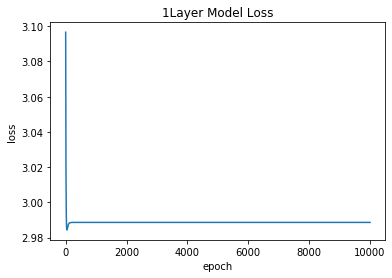

In [7]:
## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.title('1Layer Model Loss')
plt.xlabel("epoch")
plt.ylabel("loss")

In [8]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]
    
    out_y = sigmoid(np.matmul(xin,W1)+b1)

    pred = out_y
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
    

input:  [1 1] , answer:  0 , pred: 0.5263
input:  [1 0] , answer:  1 , pred: 0.5263
input:  [0 1] , answer:  1 , pred: 0.5000
input:  [0 0] , answer:  0 , pred: 0.5000


In [9]:
#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

#layer 1개인 경우 weight와 bias 저장
np.savetxt("20161147_layer1_weight.txt",(W1, b1),fmt="%s")

# 2-layer 학습

In [10]:
# Weight Setting
# 학습에 사용되는 Weigth 들의 초기값을 선언

np.random.seed(20161147)

W1 = np.random.randn(2,3)
W2 = np.random.randn(3,1)
b1 = np.random.randn(1,3)
b2 = np.random.randn(1,1)

In [11]:
# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #
# 학습이 시작됩니다.
# epoch 사이즈만큼 for 문을 통해 학습됩니다.
# 빈 칸을 채워 Weight과 bias를 학습하는 신경망을 설계하세요.
# 양식의 모든 내용을 무조건 따를 필요는 없습니다. 각자에게 편하게 수정하셔도 좋습니다.

errors = []

for epoch in range(epochs):
        
    # 데이터 4가지 중 랜덤으로 하나 선택
    loss = 0
    for batch in range(4):
        idx = random.randint(0,3)
#         idx = batch

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]
        
        # Layer에 맞는 Forward Network 구성
        ## hidden neuron 구성
        net_h = xin.dot(W1)+b1
        out_h = sigmoid(net_h)
        
        ## hidden neuron을 통한 예측치 구성
        net_y = out_h.dot(W2)+b2
        out_y = sigmoid(net_y)

        # Binary Corss Entropy(BCE)로 loss 계산
        J = -np.log((out_y**ans) * (1-out_y)**(1-ans))[0,0]
        loss += J     
        
        # Back propagation을 통한 Weight의 Gradient update step
#         delta_W1 = (-(ans - out_y)*out_y*(1-out_y)*W2*(out_h*(1-out_h)).T*xin).T
#         delta_W2 = (-(ans - out_y)*out_y*(1-out_y)*out_h).T
#         delta_b1 = (-(ans - out_y)*out_y*(1-out_y)*W2*(out_h*(1-out_h)).T).T
#         delta_b2 = (-(ans - out_y)*out_y*(1-out_y)).T
        
        delta_W1 = ((-( ans*(1-out_y)-(1-ans)*out_y ).dot(W2.T)*out_h*(1-out_h)).T.dot(xin)).T
        delta_W2 = (-( ans*(1-out_y)-(1-ans)*out_y ).T.dot(out_h)).T
        delta_b1 = -( ans*(1-out_y)-(1-ans)*out_y ).dot(W2.T)*out_h*(1-out_h)
        delta_b2 = -( ans*(1-out_y)-(1-ans)*out_y )
        

    
        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2

        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2
        
        
        ## 1000번째 epoch마다 loss를 프린트 합니다.
    if epoch%1000 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        

    errors.append(loss)


epoch[0/10000] loss: 0.6668
epoch[1000/10000] loss: 0.1516
epoch[2000/10000] loss: 0.0334
epoch[3000/10000] loss: 0.0183
epoch[4000/10000] loss: 0.0137
epoch[5000/10000] loss: 0.0108
epoch[6000/10000] loss: 0.0104
epoch[7000/10000] loss: 0.0074
epoch[8000/10000] loss: 0.0064
epoch[9000/10000] loss: 0.0056


Text(0, 0.5, 'loss')

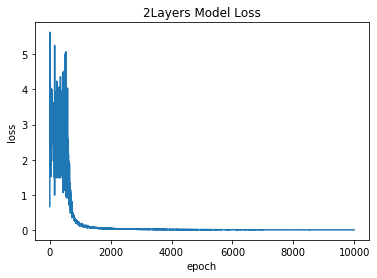

In [12]:
## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.title('2Layers Model Loss')
plt.xlabel("epoch")
plt.ylabel("loss")

In [13]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]
    
    x1 = sigmoid(np.matmul(xin,W1)+b1)
    x2 = sigmoid(np.matmul(x1,W2)+b2)

    pred = x2
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
    

input:  [1 1] , answer:  0 , pred: 0.0019
input:  [1 0] , answer:  1 , pred: 0.9989
input:  [0 1] , answer:  1 , pred: 0.9990
input:  [0 0] , answer:  0 , pred: 0.0010


In [14]:
#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

#layer 2개인 경우 weight와 bias 저장
np.savetxt("20161147_layer2_weight.txt",(W1, W2, b1, b2),fmt="%s")